# Import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!pwd
import os
os.chdir('/content/drive/MyDrive/Project4/')
!pwd

/content/drive/MyDrive/Project3
/content/drive/MyDrive/Project4


In [7]:
import re
import nltk
import pickle
import string
import numpy as np
import pandas as pd

In [24]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

from keras.utils import pad_sequences
from keras.layers import Dense, Embedding, LSTM, Dropout , GlobalAveragePooling1D
from keras.layers import Bidirectional
from keras.layers import SpatialDropout1D
from keras.layers import GRU
from keras.models import Sequential

from matplotlib import pyplot

#Train the model:
from keras.callbacks import EarlyStopping
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score,
                             f1_score,
                             classification_report , confusion_matrix )

import seaborn as sn
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Read and exploring the data

In [9]:
df = pd.read_csv('process_data/df2_Add_era_country.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58020 entries, 0 to 58019
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   poem_id     58020 non-null  int64 
 1   poet_name   58020 non-null  object
 2   poem_title  58020 non-null  object
 3   poem_text   58020 non-null  object
 4   era         58020 non-null  object
 5   country     27146 non-null  object
 6   poem_style  58020 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.1+ MB


In [11]:
df.head()

,poem_id,poet_name,poem_title,poem_text,era,country,poem_style
0,21,بدر شاكر السياب,أنشودة المطر,عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي...,العصر الحديث,العراق,فصحى
1,65546,بدر شاكر السياب,أقداح و أحلام,انا لا ازال و في يدي قدحي ياليل اين تفرق الشر...,العصر الحديث,العراق,فصحى
2,65561,بدر شاكر السياب,هوى واحد !,علي مقلتيك ارتشفت النجوم وعانقت امالي الايبة ...,العصر الحديث,العراق,فصحى
3,65554,بدر شاكر السياب,أساطير,اساطير من حشرجات الزمان نسيج اليد البالية رواه...,العصر الحديث,العراق,فصحى
4,65550,بدر شاكر السياب,اللقاء الأخير,والتف حولك ساعداي ومال جيدك في اشتهاء كالزهرة ...,العصر الحديث,العراق,فصحى


In [12]:
# df.tail()

In [13]:
df.describe()

,poem_id
count,58020.000000
mean,45930.835419
std,28698.053977
min,10.000000
25%,16626.750000
50%,56669.500000
75%,71653.250000
max,86650.000000


In [14]:
df.shape

(58020, 7)

# 3.	Remove any unwanted characters (e.g., “-“, “;”).

### Removing Non-arabic letters, numbers, amiss typo and special characters


In [15]:
# print (string.punctuation)
# arabic_punctuations = '''«»`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
# english_punctuations = string.punctuation
# punctuations_list = arabic_punctuations + english_punctuations
# print (punctuations_list)

# arabic_diacritics = re.compile("""
#                              ّ    | # Tashdid
#                              َ    | # Fatha
#                              ً    | # Tanwin Fath
#                              ُ    | # Damma
#                              ٌ    | # Tanwin Damm
#                              ِ    | # Kasra
#                              ٍ    | # Tanwin Kasr
#                              ْ    | # Sukun
#                              ـ     # Tatwil/Kashida
#                          """, re.VERBOSE)

# print (arabic_diacritics)

In [16]:
# # function to clean and normalize text
# def clean_text(text):
#     search = ["أ","إ","آ","ة","_","-","/",".","،"," و "," يا ",'"',"ـ","'","ى","\\",'\n', '\t','&quot;','?','؟','!']
#     replace = ["ا","ا","ا","ه"," "," ","","",""," و"," يا","","","","ي","",' ', ' ',' ',' ? ',' ؟ ',' ! ']

#     p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
#     text = re.sub(p_tashkeel,"", text)
#     p_longation = re.compile(r'(.)\1+')
#     subst = r"\1\1"
#     text = re.sub(p_longation, subst, text)

#     text = text.replace('وو', 'و')
#     text = text.replace('يي', 'ي')
#     text = text.replace('اا', 'ا')

#     for i in range(0, len(search)):
#        #print (search[i], replace[i])
#         text = text.replace(search[i], replace[i])
#     text = text.strip()
#     return text


# def remove_punctuations(text):
#     translator = str.maketrans('', '', punctuations_list)
#     return text.translate(translator)


# def normalize_arabic(text):
#     text = re.sub("[إأآا]", "ا", text)
#     text = re.sub("ى", "ي", text)
#     text = re.sub("ؤ", "ء", text)
#     text = re.sub("ئ", "ء", text)
#     text = re.sub("ة", "ه", text)
#     text = re.sub("گ", "ك", text)
#     return text


# def remove_diacritics(text):
#     text = re.sub(arabic_diacritics, '', text)
#     return text


# def remove_repeating_char(text):
#     return re.sub(r'(.)\1+', r'\1', text)


# # clean and normalize text
# df["poem_text_clean"] = df.poem_text.apply(lambda x: clean_text(x))

# # remove punctuation
# df.poem_text_clean  = df.poem_text_clean.apply(lambda x: remove_punctuations(x))

# # remove diacritics
# df.poem_text_clean  = df.poem_text_clean.apply(lambda x: remove_diacritics(x))

# # remove repeating char
# df.poem_text_clean  = df.poem_text_clean.apply(lambda x: remove_repeating_char(x))

# # remove english letters
# df.poem_text_clean = df.poem_text_clean.apply(lambda x: re.sub(r'[a-zA-Z]', '', x))

# # remove a special character
# df.poem_text_clean = df.poem_text_clean.apply(lambda x: re.sub(r'[_]+', '', x))

# # remove english numbers
# df.poem_text_clean = df.poem_text_clean.apply(lambda x: re.sub(r'/[0-9\u0621-\u064A]+/u', '', x))

# # remove space
# df.poem_text_clean  = df.poem_text_clean.str.replace(r'\d+','', regex=True)


In [ ]:
# df.head()

 ### Loading and Cleaning Reviews

In [25]:
stopword = set(stopwords.words('arabic'))
print( len (stopword))
#print (stopword)

701


In [18]:
# turn a doc into clean tokens
def clean_doc(doc):

    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    tokens = [w for w in tokens if not w in stopword]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]

    #return tokens
    return  " ".join(tokens) +"\n"

In [26]:
text = df.poem_text[:1]
text , type(text)

(0    عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي...
 Name: poem_text, dtype: object,
 pandas.core.series.Series)

In [27]:
text = text.values[0]
text

'عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي عنهما القمر عيناك حين تبسمان تورق الكروم وترقص الاضواء كالاقمار في نهر يرجه المجذاف وهنا ساعة السحر كانما تنبض في غوريهما النجوم وتغرقان في ضباب من اسي شفيف كالبحر سرح اليدين فوقه المساء دفء الشتاء فيه وارتعاشة الخريف والموت والميلاد والظلام والضياء فتستفيق ملء روحي رعشة البكاء ونشوة وحشية تعانق السماء كنشوة الطفل اذا خاف من القمر كان اقواس السحاب تشرب الغيوم وقطرة فقطرة تذوب في المطر وكركر الاطفال في عراءش الكروم ودغدغت صمت العصافير علي الشجر انشودة المطر مطر مطر مطر تثاءب المساء والغيوم ما تزال تسح ما تسح من دموعها الثقال كان طفلا بات يهذي قبل ان ينام بان امه – التي افاق منذ عام فلم يجدها ثم حين لج في السءال قالوا له "بعد غد تعود " لا بد ان تعود وان تهامس الرفاق انها هناك في جانب التل تنام نومة الحود تسف من ترابها وتشرب المطر كان صيادا حزينا يجمع الشباك ويلعن المياه والقدر وينثر الغناء حيث يافل القمر مطر مطر اتعلمين اي حزن يبعث المطر وكيف تنشج المزاريب اذا انهمر وكيف يشعر الوحيد فيه بالضياع بلا انتهاء – كالدم المراق كالجياع كالحب كالاطف

In [28]:
print ("len text befor clean " , len(text.split()))
text_clean = clean_doc(text)
print(text_clean)

print ("len token after clean " , len(text_clean.split()))

len text befor clean  509
عيناك غابتا نخيل ساعة السحر او شرفتان يناي عنهما القمر عيناك تبسمان تورق الكروم وترقص الاضواء كالاقمار نهر يرجه المجذاف وهنا ساعة السحر كانما تنبض غوريهما النجوم وتغرقان ضباب اسي شفيف كالبحر سرح اليدين فوقه المساء دفء الشتاء وارتعاشة الخريف والموت والميلاد والظلام والضياء فتستفيق ملء روحي رعشة البكاء ونشوة وحشية تعانق السماء كنشوة الطفل اذا خاف القمر اقواس السحاب تشرب الغيوم وقطرة فقطرة تذوب المطر وكركر الاطفال عراءش الكروم ودغدغت صمت العصافير علي الشجر انشودة المطر مطر مطر مطر تثاءب المساء والغيوم تزال تسح تسح دموعها الثقال طفلا يهذي ان ينام بان امه افاق عام فلم يجدها لج السءال قالوا غد تعود بد ان تعود وان تهامس الرفاق انها جانب التل تنام نومة الحود تسف ترابها وتشرب المطر صيادا حزينا يجمع الشباك ويلعن المياه والقدر وينثر الغناء يافل القمر مطر مطر اتعلمين اي حزن يبعث المطر وكيف تنشج المزاريب اذا انهمر وكيف يشعر الوحيد بالضياع بلا انتهاء كالدم المراق كالجياع كالحب كالاطفال كالموتي المطر ومقلتاك تطيفان المطر وعبر امواج الخليج تمسح البروق سواحل العراق بالنجوم وال

In [29]:
 # clean and normalize text
df["poem_text_clean"]  = df.poem_text.apply(lambda x: clean_doc(x))

In [30]:
df.head()

,poem_id,poet_name,poem_title,poem_text,era,country,poem_style,poem_text_clean
0,21,بدر شاكر السياب,أنشودة المطر,عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي...,العصر الحديث,العراق,فصحى,عيناك غابتا نخيل ساعة السحر او شرفتان يناي عنه...
1,65546,بدر شاكر السياب,أقداح و أحلام,انا لا ازال و في يدي قدحي ياليل اين تفرق الشر...,العصر الحديث,العراق,فصحى,انا ازال يدي قدحي ياليل اين تفرق الشرب زلت اشر...
2,65561,بدر شاكر السياب,هوى واحد !,علي مقلتيك ارتشفت النجوم وعانقت امالي الايبة ...,العصر الحديث,العراق,فصحى,علي مقلتيك ارتشفت النجوم وعانقت امالي الايبة و...
3,65554,بدر شاكر السياب,أساطير,اساطير من حشرجات الزمان نسيج اليد البالية رواه...,العصر الحديث,العراق,فصحى,اساطير حشرجات الزمان نسيج اليد البالية رواها ظ...
4,65550,بدر شاكر السياب,اللقاء الأخير,والتف حولك ساعداي ومال جيدك في اشتهاء كالزهرة ...,العصر الحديث,العراق,فصحى,والتف حولك ساعداي ومال جيدك اشتهاء كالزهرة الو...


# Label  Encoder

In [31]:
df.poem_style.unique()

array(['فصحى', 'عامي'], dtype=object)

In [32]:
df["poem_style"].value_counts()

فصحى    57893
عامي      127
Name: poem_style, dtype: int64

In [33]:
# Applying the condition for binary labeling
df["label"] = np.where(df["poem_style"] == "عامي"  , 0, 1)

# Train-test-split

Let’s split the dataset into train and test before feature extraction.

In [34]:
X = df.poem_text_clean
y = df.label

In [35]:
X.shape , y.shape

((58020,), (58020,))

In [36]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((46416,), (11604,), (46416,), (11604,))

# 5.3. Tokenization

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

training_data = vectorizer.fit_transform(X_train)
testing_data = vectorizer.transform(X_test)

print("Training Data shape = ",training_data.shape)
print("Testing Data shape = ", testing_data.shape)

Training Data shape =  (46416, 452318)
Testing Data shape =  (11604, 452318)


# Instantiate Models

In [39]:
from sklearn.naive_bayes import BernoulliNB , MultinomialNB

In [40]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report , confusion_matrix , accuracy_score
)
import seaborn as sn
import matplotlib.pyplot as plt

# MultinomialNB

### Training Naive Bayes (NB) classifier on training data.

In [41]:
MultiNB = MultinomialNB()

MultiNB.fit(training_data,y_train.values.ravel()) # training

y_pred_MultiNB=MultiNB.predict(testing_data) #testing

In [42]:
print(classification_report(y_test, y_pred_MultiNB ,  labels=np.unique(y_pred_MultiNB)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     11577

   micro avg       1.00      1.00      1.00     11577
   macro avg       1.00      1.00      1.00     11577
weighted avg       1.00      1.00      1.00     11577



<Axes: >

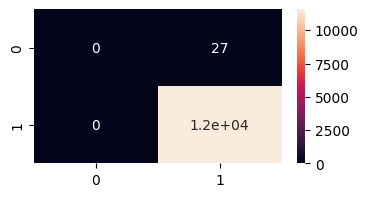

In [43]:
df_metrics_MultiNB = pd.DataFrame(confusion_matrix(y_test,y_pred_MultiNB))

plt.figure(figsize = (4,2))

sn.heatmap(df_metrics_MultiNB, annot=True)

# BernoulliNB

In [44]:
BerNV = BernoulliNB()

BerNV.fit(training_data,y_train.values.ravel()) # training

y_pred_BerNV = BerNV.predict(testing_data) #testing

In [45]:
print(classification_report(y_test, y_pred_BerNV ,  labels=np.unique(y_pred_BerNV)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       1.00      1.00      1.00     11577

    accuracy                           1.00     11604
   macro avg       0.50      0.50      0.50     11604
weighted avg       1.00      1.00      1.00     11604



<Axes: >

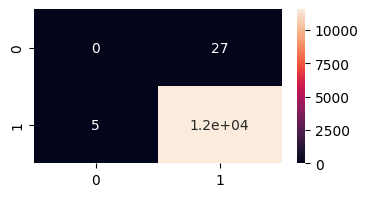

In [46]:
# confusion matrix
df_metrics_BerNV = pd.DataFrame(confusion_matrix(y_test,y_pred_BerNV))

plt.figure(figsize = (4,2))
sn.heatmap(df_metrics_BerNV, annot=True)

# LinearSVC

In [47]:
from sklearn.svm import LinearSVC

lsvm=LinearSVC()

lsvm.fit(training_data,y_train.values.ravel()) #training

y_pred_lsvm = lsvm.predict(testing_data) #testing

In [48]:
print(classification_report(y_test, y_pred_lsvm ,  labels=np.unique(y_pred_lsvm)))

              precision    recall  f1-score   support

           0       0.40      0.07      0.12        27
           1       1.00      1.00      1.00     11577

    accuracy                           1.00     11604
   macro avg       0.70      0.54      0.56     11604
weighted avg       1.00      1.00      1.00     11604



<Axes: >

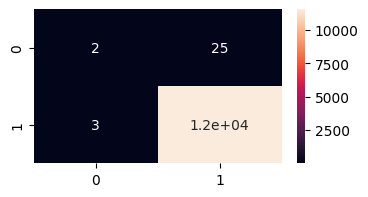

In [49]:
df_metrics_lsvm = pd.DataFrame(confusion_matrix(y_test,y_pred_lsvm))

plt.figure(figsize = (4,2))
sn.heatmap(df_metrics_lsvm, annot=True)

# LogisticRegression

In [50]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', max_iter=3000)

lr.fit(training_data,y_train.values.ravel()) #training

y_pred_lr=lr.predict(testing_data) #testing

In [51]:
print(classification_report(y_test, y_pred_lr ,  labels=np.unique(y_pred_lr)))

              precision    recall  f1-score   support

           0       0.50      0.07      0.13        27
           1       1.00      1.00      1.00     11577

    accuracy                           1.00     11604
   macro avg       0.75      0.54      0.56     11604
weighted avg       1.00      1.00      1.00     11604



<Axes: >

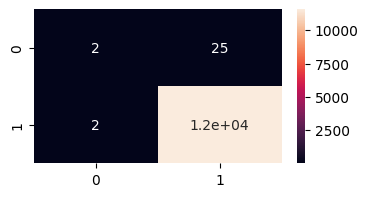

In [52]:
df_metrics_lr = pd.DataFrame(confusion_matrix(y_test,y_pred_lr))

plt.figure(figsize = (4,2))
sn.heatmap(df_metrics_lr, annot=True)

# DecisionTreeClassifier

In [53]:
from sklearn import tree

#DT = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
DT = tree.DecisionTreeClassifier()

DT.fit(training_data,y_train.values.ravel()) #training

y_pred_DT=DT.predict(testing_data) #testing

In [54]:
print(classification_report(y_test, y_pred_DT ,  labels=np.unique(y_pred_DT)))

              precision    recall  f1-score   support

           0       0.41      0.26      0.32        27
           1       1.00      1.00      1.00     11577

    accuracy                           1.00     11604
   macro avg       0.71      0.63      0.66     11604
weighted avg       1.00      1.00      1.00     11604



<Axes: >

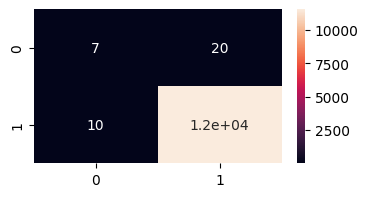

In [55]:
df_metrics_DT = pd.DataFrame(confusion_matrix(y_test,y_pred_DT))

plt.figure(figsize = (4,2))
sn.heatmap(df_metrics_DT, annot=True)

In [56]:
print('accuracy score of MultinomialNB: {:2.1f}%'.format(accuracy_score(y_test, y_pred_MultiNB) *100.))
print('accuracy score of BernoulliNB: {:2.1f}%'.format(accuracy_score(y_test, y_pred_BerNV) *100.))
print('accuracy score of SVM: {:2.1f}%'.format(accuracy_score(y_test, y_pred_lsvm) *100.))
print('accuracy score of LR: {:2.1f}%'.format(accuracy_score(y_test, y_pred_lr) *100.))
print('accuracy score of DT: {:2.1f}%'.format(accuracy_score(y_test, y_pred_DT) *100.))

accuracy score of MultinomialNB: 99.8%
accuracy score of BernoulliNB: 99.7%
accuracy score of SVM: 99.8%
accuracy score of LR: 99.8%
accuracy score of DT: 99.7%


# save model

In [57]:
import pickle

with open('model_classfication/BerNV_model.pickle', 'wb') as f:
    pickle.dump(BerNV, f)

with open('model_classfication/MultiNB_model.pickle', 'wb') as f:
    pickle.dump(MultiNB, f)

with open('model_classfication/lsvm_model.pickle', 'wb') as f:
    pickle.dump(lsvm, f)

with open('model_classfication/lr_model.pickle', 'wb') as f:
    pickle.dump(lr, f)

with open('model_classfication/dt_model.pickle', 'wb') as f:
    pickle.dump(DT, f)


pickle.dump(vectorizer, open("model_classfication/vectorizer.pickle", "wb")) #//Save vectorizer

# Predict sentence from dataset 1

In [58]:
import pandas as pd
import numpy as np

# Read Dataset 1

In [59]:
df1 = pd.read_csv('process_data/df1_Add_era_country.csv')

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54944 entries, 0 to 54943
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   poem_id     54944 non-null  int64 
 1   poet_name   54944 non-null  object
 2   poem_title  54944 non-null  object
 3   poem_text   54944 non-null  object
 4   era         54944 non-null  object
 5   country     13409 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.5+ MB


In [61]:
df1.head()

,poem_id,poet_name,poem_title,poem_text,era,country
0,0,خلفان بن مصبح,بدت تختال في حُلل الجمالِ,بدت تختال في حُلل الجمالِ\nوجادت بالزيارة والو...,العصر الحديث,الإمارات
1,1,خلفان بن مصبح,يا طائر الشعر القرير,يا طائر الشعر القرير\nيا وحي إلهام الصدور\nأسع...,العصر الحديث,الإمارات
2,2,خلفان بن مصبح,بنت حجرات أرى من عجب,بنت حجرات أرى من عجب\nأن أرى فيك جمال العرب\nد...,العصر الحديث,الإمارات
3,3,خلفان بن مصبح,هذا الربيع بنور الحسن وافانا,هذا الربيع بنور الحسن وافانا\nوقد كسا الأرض با...,العصر الحديث,الإمارات
4,4,خلفان بن مصبح,روحي فداك وإن مُنحتُ صدوداً,روحي فداك وإن مُنحتُ صدوداً\nأخفاك ما بي أم أط...,العصر الحديث,الإمارات


In [62]:
df1.shape

(54944, 6)

In [63]:
stopword = set(stopwords.words('arabic'))

# turn a doc into clean tokens
def clean_doc(doc):

    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    tokens = [w for w in tokens if not w in stopword]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]

    #return tokens
    return  " ".join(tokens) +"\n"

In [64]:
import pickle

# load the vectorizer
tokenizer = pickle.load(open('model_classfication/vectorizer.pickle', 'rb'))

# load the model
model_predict = pickle.load(open('model_classfication/lsvm_model.pickle', 'rb'))

#### test predict for 1 row

In [65]:
phrase= clean_doc(df1.poem_text[1])
phrase

'طائر الشعر القرير وحي إلهام الصدور أسعف لساني برهة بالشعر النصير فلعله تأجج سعير مجد العروبة يستثار يثور صابهم صابهم فتور مجد العروبة عرشه البنين وتقسمت أوطانهم الطغاة الجائرين والذل سيطر فيهمو واحسرتا دنيا ودين والشرق للمجير وللمعين أبناؤه أسلموا بقيادهم للظالمين بالسيف سادوا الخافقين داء التواكل فشا فينا فواعجز المراد وملوكنا أسماؤهم جماد يرجون أعدائهم يصلحوا الفساد دام حالنا فالبس الشرق الحداد بالسيف سادوا الخافقين بالشام كانت وقفة جهار الروم شتت شملهم يملكون الفرار والعرب سادوا أرضهم وتملكوا الديار بالسيف والعدل والحق بينهما منار وابن الوليد وكم أتى الله أكبر بانتصار فتحوا العواصم كلها قرار كسرى وقيصر أصبحا انكسار فهمو همو همو بالسيف سادوا الخافقين أسطول مجدهم أدراك الهمم قطع البحار للغرب يخترق الخضم اسبانيا تحزني العلم جاءك لله درك طارق حزت السباق الأمم تركوا السفين كيما قدم همو همو بالسيف سادوا الخافقين لذريق يرض الهوان ولم يجد ساعة البلاد الحق يرفع صوته الله ينصر أراد نصر الاله جنوده البلاد رفعوا الفنون بعلمهم آثارهم المعاد فهمو همو همو بالسيف سادوا الخافقين يكفهم أحرزوا بالفتح

In [66]:
test_str = vectorizer.transform([phrase])
test_str

<1x452318 sparse matrix of type '<class 'numpy.int64'>'
	with 134 stored elements in Compressed Sparse Row format>

In [67]:
model_predict.predict(test_str.toarray())[0]

1

#### test predict for 5 row

In [68]:
for i in range(5):
    phrase= clean_doc(df1.poem_text[i])
    test_str = vectorizer.transform([phrase])
    print (phrase ,  model_predict.predict(test_str.toarray())[0])
    print ("-"*80)

بدت تختال وجادت بالزيارة والوصال تميس يعادلها قضيب ترنو تداعب بالنصال بمبسمها أبيك وفي أعماقها نبع وخصر يستبيك تولت كغصن البان كالقضيب كثيب كالمنيرة الليالي فقمت أداعب الوجنات وألثم ثغرها حكي اللآلي غصنها وألهو باليمين وبالشمال خلق العفاف رقيب بطهر الحب حسن الخلال وقد غاب الرقيب وطاب أنسي وطير الحب يصدح بامتثال تقول أراك تظهر وتفعل كالمودع للرحال فقلت قلبي وحبي يكن بسالي ولكني عزمت ليهزأ والعوالي سئمت المقام وكل شيء دام محال سأضرب الحياة بسهم جدي ونحظى بالمسرة والوصال وأرجع يشا الباري لنبتني صرح المعالي فرقرق لؤلؤ مقلتيها وصاحت الليالي أتترك الروح يكاد يذوب لحالي وتسلوني وأنت نعيم روحي ترعى المودة تبالي ليحفظ الإله بكل أرض ويرزقك السلامة الكمال وجمنا نحر الدمع فاض التوالي ولاح الصبح الثريا لاح المشيب بعين قال فيالله ذابت قلوب وكم سالت دموع كاللآلي ليوم السبت شوال قمنا لأربع خلون وعشر تال ركبنا الزرقاء نحدو وفوضنا الأمور لذي الجلال وسار الفلك يمخر عباب تقاذفه الجنوب الشمال ولاح الكويت مغيب وقد جزنا وقت الزوال حالول سرنا بانتباه ومجرانا السماك بكل حال وهبت نصف الليل ريح الجمع يمسك بالحبا

####  predict all row in dataset 1

In [69]:
def predict(text):
    phrase= clean_doc(df1.poem_text[1])
    test_str = vectorizer.transform([phrase])
    prod =  model_predict.predict(test_str.toarray())[0]
    return 'فصحى' if prod == 1 else 'عامي'

In [70]:
# predict all poem_text by model lsvm_model
df1['poem_style'] = df1.poem_text.apply(lambda x: predict(x))

In [71]:
df1.head()

,poem_id,poet_name,poem_title,poem_text,era,country,poem_style
0,0,خلفان بن مصبح,بدت تختال في حُلل الجمالِ,بدت تختال في حُلل الجمالِ\nوجادت بالزيارة والو...,العصر الحديث,الإمارات,فصحى
1,1,خلفان بن مصبح,يا طائر الشعر القرير,يا طائر الشعر القرير\nيا وحي إلهام الصدور\nأسع...,العصر الحديث,الإمارات,فصحى
2,2,خلفان بن مصبح,بنت حجرات أرى من عجب,بنت حجرات أرى من عجب\nأن أرى فيك جمال العرب\nد...,العصر الحديث,الإمارات,فصحى
3,3,خلفان بن مصبح,هذا الربيع بنور الحسن وافانا,هذا الربيع بنور الحسن وافانا\nوقد كسا الأرض با...,العصر الحديث,الإمارات,فصحى
4,4,خلفان بن مصبح,روحي فداك وإن مُنحتُ صدوداً,روحي فداك وإن مُنحتُ صدوداً\nأخفاك ما بي أم أط...,العصر الحديث,الإمارات,فصحى


In [72]:
df1.poem_style.unique()

array(['فصحى'], dtype=object)

In [73]:
#save poet_name_in_df1_repeat to file csv
df1.to_csv("process_data/df1_with_style.csv", encoding='utf-8-sig', index=False, header=True)